In [139]:
import math
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn import metrics
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import mean_absolute_error
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
import subprocess as sp 
import scipy.stats as st
import sys,os,shutil,pickle,time
%matplotlib inline

# Data cleaning

In [140]:
df = pd.read_csv('vehicles.csv')
df.head()

,Unnamed: 0,id,url,region,region_url,price,year,manufacturer,model,condition,...,drive,size,type,paint_color,image_url,description,state,lat,long,posting_date
0,0,7240372487,https://auburn.craigslist.org/ctd/d/auburn-uni...,auburn,https://auburn.craigslist.org,35990,2010.0,chevrolet,corvette grand sport,good,...,rwd,NaN,other,NaN,https://images.craigslist.org/00N0N_ipkbHVZYf4...,Carvana is the safer way to buy a car During t...,al,32.590000,-85.480000,2020-12-02T08:11:30-0600
1,1,7240309422,https://auburn.craigslist.org/cto/d/auburn-201...,auburn,https://auburn.craigslist.org,7500,2014.0,hyundai,sonata,excellent,...,fwd,NaN,sedan,NaN,https://images.craigslist.org/00s0s_gBHYmJ5o7y...,I'll move to another city and try to sell my c...,al,32.547500,-85.468200,2020-12-02T02:11:50-0600
2,2,7240224296,https://auburn.craigslist.org/cto/d/auburn-200...,auburn,https://auburn.craigslist.org,4900,2006.0,bmw,x3 3.0i,good,...,NaN,NaN,SUV,blue,https://images.craigslist.org/00B0B_5zgEGWPOrt...,Clean 2006 BMW X3 3.0I. Beautiful and rare Bl...,al,32.616807,-85.464149,2020-12-01T19:50:41-0600
3,3,7240103965,https://auburn.craigslist.org/cto/d/lanett-tru...,auburn,https://auburn.craigslist.org,2000,1974.0,chevrolet,c-10,good,...,rwd,full-size,pickup,blue,https://images.craigslist.org/00M0M_6o7KcDpArw...,1974 chev. truck (LONG BED) NEW starter front ...,al,32.861600,-85.216100,2020-12-01T15:54:45-0600
4,4,7239983776,https://auburn.craigslist.org/cto/d/auburn-200...,auburn,https://auburn.craigslist.org,19500,2005.0,ford,f350 lariat,excellent,...,4wd,full-size,pickup,blue,https://images.craigslist.org/00p0p_b95l1EgUfl...,2005 Ford F350 Lariat (Bullet Proofed). This t...,al,32.547500,-85.468200,2020-12-01T12:53:56-0600


In [141]:
df.shape

(458213, 26)

In [142]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 458213 entries, 0 to 458212
Data columns (total 26 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Unnamed: 0    458213 non-null  int64  
 1   id            458213 non-null  int64  
 2   url           458213 non-null  object 
 3   region        458213 non-null  object 
 4   region_url    458213 non-null  object 
 5   price         458213 non-null  int64  
 6   year          457163 non-null  float64
 7   manufacturer  439993 non-null  object 
 8   model         453367 non-null  object 
 9   condition     265273 non-null  object 
 10  cylinders     287073 non-null  object 
 11  fuel          454976 non-null  object 
 12  odometer      402910 non-null  float64
 13  title_status  455636 non-null  object 
 14  transmission  455771 non-null  object 
 15  VIN           270664 non-null  object 
 16  drive         324025 non-null  object 
 17  size          136865 non-null  object 
 18  type

In [143]:
## Drop the inrelevent columns
df = df.drop(columns=['Unnamed: 0', 'id', 'url', 'image_url','size', 'region_url', 'VIN', 'lat', 'long', 'region', 'description', 'posting_date'], axis = 1)

In [144]:
df

,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,type,paint_color,state
0,35990,2010.0,chevrolet,corvette grand sport,good,8 cylinders,gas,32742.0,clean,other,rwd,other,NaN,al
1,7500,2014.0,hyundai,sonata,excellent,4 cylinders,gas,93600.0,clean,automatic,fwd,sedan,NaN,al
2,4900,2006.0,bmw,x3 3.0i,good,6 cylinders,gas,87046.0,clean,automatic,NaN,SUV,blue,al
3,2000,1974.0,chevrolet,c-10,good,4 cylinders,gas,190000.0,clean,automatic,rwd,pickup,blue,al
4,19500,2005.0,ford,f350 lariat,excellent,8 cylinders,diesel,116000.0,lien,automatic,4wd,pickup,blue,al
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
458208,14995,2014.0,cadillac,srx,excellent,6 cylinders,gas,83790.0,clean,automatic,4wd,SUV,silver,wi
458209,17895,2018.0,hyundai,tucson,excellent,4 cylinders,gas,31888.0,clean,automatic,4wd,SUV,white,wi
458210,17900,2014.0,cadillac,cts coupe awd,excellent,6 cylinders,gas,53000.0,clean,automatic,4wd,coupe,black,wy
458211,1300,2008.0,jeep,grand cherokee,good,8 cylinders,gas,164000.0,clean,automatic,4wd,SUV,white,wy


In [145]:
df.isnull().sum()

price                0
year              1050
manufacturer     18220
model             4846
condition       192940
cylinders       171140
fuel              3237
odometer         55303
title_status      2577
transmission      2442
drive           134188
type            112738
paint_color     140843
state                0
dtype: int64

In [146]:
df.describe()

,price,year,odometer
count,4.582130e+05,457163.000000,4.029100e+05
mean,4.042093e+04,2010.746067,1.016698e+05
std,8.194599e+06,8.868136,3.228623e+06
min,0.000000e+00,1900.000000,0.000000e+00
25%,4.900000e+03,2008.000000,4.087700e+04
50%,1.099500e+04,2013.000000,8.764100e+04
75%,2.149500e+04,2016.000000,1.340000e+05
max,3.615215e+09,2021.000000,2.043756e+09


### Eliminate extreme data 
As we observe, we eliminate cars with price under 750 which doesn't make sense
We would eliminate the cars earlier than 2000 since it's not propriate observation for our prediction. 
Also Odometers higher than 300k or lower than 10 are also reasonable to eliminate

In [147]:
df=df[(df.price < 100000) & (df.price >= 750 )]
df.shape

(411116, 14)

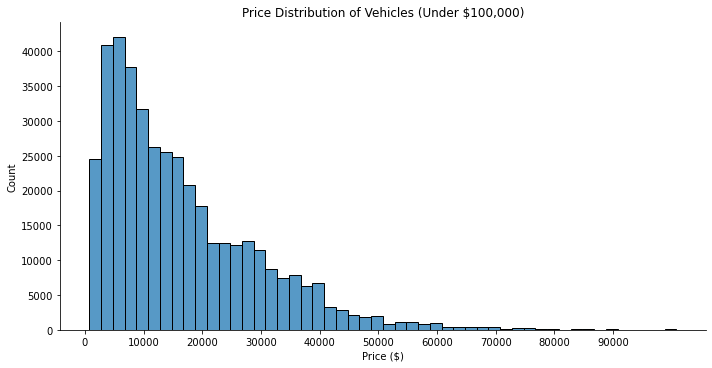

In [148]:
sns.displot(df, x='price', binwidth=2000, height=5, aspect=2)#, bw_adjust=0.4)
plt.xticks(range(0,int(1e5), int(1e4)))
plt.xlabel('Price ($)')
plt.title('Price Distribution of Vehicles (Under $100,000)')
plt.show()

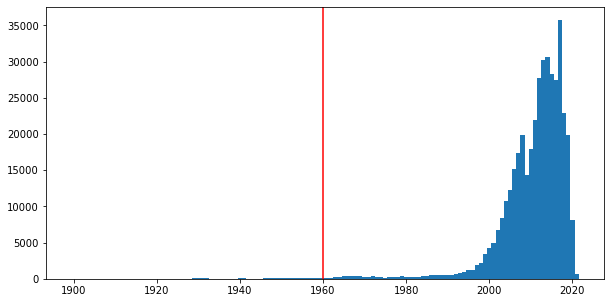

In [149]:
starting_year = 1960
x = (df.groupby(['year'],as_index = False).count())['year'].tolist()
y = (df.groupby(['year'],as_index = False).count())['price'].tolist()
fig = plt.figure(figsize=(10,5))
plt.bar(x, y, width=1)
plt.axvline(starting_year, color = 'red')

In [150]:
## Delete cars before 1960
df=df[df.year>1960]
df['year'] = (df['year']-1900).astype(int)

df.shape

(407947, 14)

In [151]:
top1 = np.nanpercentile(df['odometer'], 99)
print('the top 1% mileage is', top1, 'miles')
df = df[df['odometer'] < top1]
df.shape

the top 1% mileage is 272000.0 miles


(359575, 14)

In [152]:
## Delete unknow fuel, transmission manufacturer and title_status 
df.dropna(subset = ['fuel', 'transmission', 'title_status'], axis = 0, inplace = True)
df = df[~df['manufacturer'].isnull()]
df = df[~df['model'].isnull()]

In the data, I assume that the condition label is affected by year and odometer, so I will fill the missing data of condition based on year and odometer.

In [153]:
df.condition.value_counts()

good         100039
excellent     91002
like new      19362
fair           5009
new             856
salvage         336
Name: condition, dtype: int64

In [154]:
df.loc[df.year>=2019, 'condition'] = df.loc[df.year>=2019, 'condition'].fillna('new')
df.loc[df.year>=2017, 'condition'] = df.loc[df.year>=2017, 'condition'].fillna('like new')

In [155]:
df['condition'].fillna('unknown', inplace = True)
df.condition.value_counts()

unknown      126098
good         100039
excellent     91002
like new      19362
fair           5009
new             856
salvage         336
Name: condition, dtype: int64

In [156]:
#replace missing color with 'unknown'

df['paint_color'].fillna('unknown', inplace = True)
df['paint_color'].unique()

array(['unknown', 'blue', 'red', 'silver', 'black', 'white', 'grey',
       'orange', 'green', 'yellow', 'custom', 'brown', 'purple'],
      dtype=object)

In [157]:
df.isnull().sum()

price                0
year                 0
manufacturer         0
model                0
condition            0
cylinders       111257
fuel                 0
odometer             0
title_status         0
transmission         0
drive            83311
type             63828
paint_color          0
state                0
dtype: int64

In [158]:
## With time series data, using pad/ffill is common so that the "last known value " is avaliable at every time point. 
df['cylinders'] = df['cylinders'].fillna(method = 'ffill')
df['drive'] = df['drive'].fillna(method = 'ffill')
df['type'] = df['type'].fillna(method='ffill')
## Transform odometer to integer
df['odometer'] = (df['odometer']).astype(int)

In [159]:
df.isnull().sum()

price           0
year            0
manufacturer    0
model           0
condition       0
cylinders       0
fuel            0
odometer        0
title_status    0
transmission    0
drive           0
type            0
paint_color     0
state           0
dtype: int64

In [160]:
df.shape

(342702, 14)

<AxesSubplot:xlabel='condition', ylabel='price'>

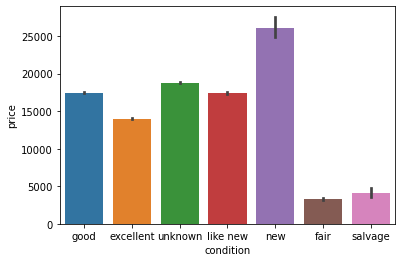

In [161]:
## Condition VS Price
sns.barplot(x = 'condition', y = 'price', data = df)

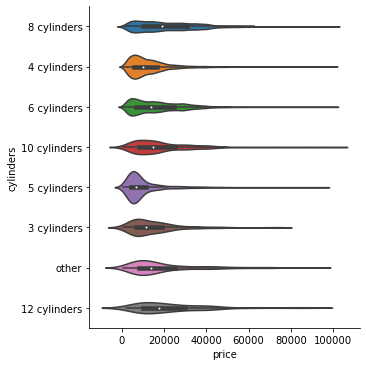

In [162]:
sns.catplot(y = 'cylinders', x = 'price', kind = 'violin', data = df)

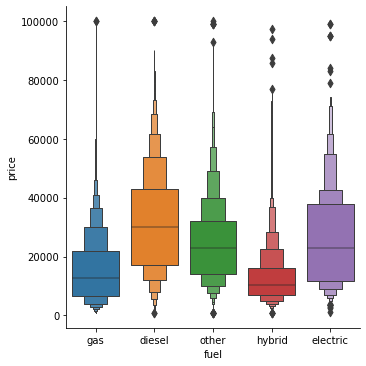

In [163]:
sns.catplot(y = 'price', x = 'fuel', kind = 'boxen', data = df)

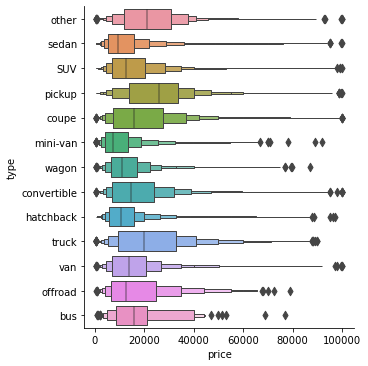

In [164]:
sns.catplot(y="type", x="price",kind="boxen", data=df)

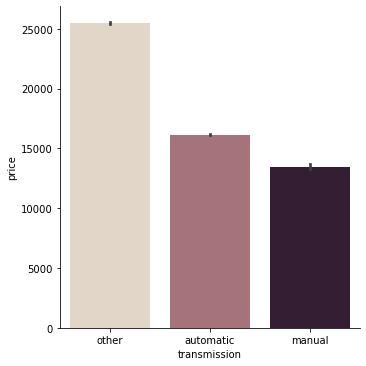

In [165]:
sns.catplot(x="transmission", y="price",kind="bar", palette="ch:.25", data=df)

## Get cleaned dataset

In [166]:
 
cleaned_data = df.copy()
df.to_csv('clean.csv', index=False)

In [167]:
df = pd.read_csv('clean.csv')
df.head()

,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,type,paint_color,state
0,35990,110,chevrolet,corvette grand sport,good,8 cylinders,gas,32742,clean,other,rwd,other,unknown,al
1,7500,114,hyundai,sonata,excellent,4 cylinders,gas,93600,clean,automatic,fwd,sedan,unknown,al
2,4900,106,bmw,x3 3.0i,good,6 cylinders,gas,87046,clean,automatic,fwd,SUV,blue,al
3,2000,74,chevrolet,c-10,good,4 cylinders,gas,190000,clean,automatic,rwd,pickup,blue,al
4,19500,105,ford,f350 lariat,excellent,8 cylinders,diesel,116000,lien,automatic,4wd,pickup,blue,al


In [168]:
## AS the model has too many different models for different brand, we will fetch only left word as its model 
model_list = df['model'].tolist()
model_list = map(str, model_list)
model_list = [x.lower().strip() for x in model_list]
my_list = [car_model.split()[0] for car_model in model_list]
my_list = [x.replace(' ', '').replace('-', '').replace('/', '') for x in my_list]

df['car_model'] = my_list
df['car_model'] = df['manufacturer'] + " " + df['car_model']

new_car_models = (df.groupby(['car_model'], as_index= False).count())[['manufacturer', 'car_model', 'price']]
new_car_models = new_car_models.rename(columns={'price': 'count'})
only_common_models = new_car_models[new_car_models['count'] > 150]

print('total car models: ', len(new_car_models['count']))
print('remaining car models: ', len(only_common_models['count']))
print('decreasing ', round((1-len(only_common_models['count'])/len(new_car_models['count'])) * 100, 2),'% of the number of car models')
print()
print('total instances: ', len(df['price']))
print('remaining instances: ', sum(only_common_models['count']))
print('removing ', round((1-sum(only_common_models['count'])/len(df['price'])) * 100, 2),'% of the instances')

total car models:  2839
remaining car models:  292
decreasing  89.71 % of the number of car models

total instances:  342702
remaining instances:  313667
removing  8.47 % of the instances


In [169]:
df.drop(['model','state'], axis=1, inplace=True)

## Label Encoding

In [170]:
## Use labelencoding to set different value to categorial variables  
label = preprocessing.LabelEncoder()
df[['manufacturer', 'car_model', 'condition', 'cylinders','fuel','title_status', 'transmission','drive','type','paint_color']] = df[['manufacturer', 'car_model', 'condition','cylinders', 'fuel','title_status', 'transmission','drive','type','paint_color']].apply(label.fit_transform)

### Split Train and Test Data

In [171]:
#train-test split
y = df['price']
X = df.drop('price', axis = 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 8)


#feature scaling
sc = StandardScaler()
print(X_train.head)


X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

#Subtracts the range between original maximum and original minimum 
sc = MinMaxScaler()   
X_train= sc.fit_transform(X_train)
X_test= sc.transform(X_test)

<bound method NDFrame.head of         year  manufacturer  condition  cylinders  fuel  odometer  \
296215   118            39          6          6     2     55984   
123979   115            13          3          6     2     70500   
275722   115            31          0          3     2    115000   
180837   113             7          0          6     2     65536   
303975   118            20          6          5     2     32338   
...      ...           ...        ...        ...   ...       ...   
231557   117            14          6          6     2     57033   
256361   113             6          6          5     4    147554   
149489   115            20          6          5     2    107907   
25940    116            34          6          6     2     46000   
70083    111             3          0          3     2    116030   

        title_status  transmission  drive  type  paint_color  car_model  
296215             0             0      1     9            9       2561  
12397

In [172]:
X_train = pd.DataFrame(X_train)
X_test = pd.DataFrame(X_test)
y_train = pd.DataFrame(y_train)
y_test = pd.DataFrame(y_test)
print('X_train', X_train.shape, 'X_test:', X_test.shape, 'y_train:', y_train.shape, 'y_test',y_test.shape)

X_train (274161, 12) X_test: (68541, 12) y_train: (274161, 1) y_test (68541, 1)


# Models

In [173]:
model_score = pd.DataFrame(columns=('MAE', 'MSE', 'RMSE'))

## Linear Regression 

In [174]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error as mse
lm = LinearRegression()
lm.fit(X_train, y_train)
y_pred_lm = lr.predict(X_test)
rmse_lm = np.sqrt(mse(y_test, y_pred_lm))
mae_lm = mean_absolute_error(y_test,y_pred_lm)
mse_lm = mse(y_test, y_pred_lm)
print('-------------Linear Regression-------------')
print("Linear Regression Model RMSE = {:.2f}".format((rmse_lm)))
print("Linear Regression Model MAE = {:.2f}".format((mae_lm)))
print("Linear Regression Model MSE = {:.2f}".format((mse_lm)))

## Add scores into the table
model_score = model_score.append(pd.DataFrame({'MAE': [mae_lm], 'MSE': [mse_lm], 'RMSE': [rmse_lm]}, index=['Linear Regression']))

-------------Linear Regression-------------
Linear Regression Model RMSE = 9033.42
Linear Regression Model MAE = 6453.66
Linear Regression Model MSE = 81602698.59


## KNN

In [175]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import pairwise_distances
from sklearn import neighbors
from math import sqrt
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split, GridSearchCV

In [176]:
knnReg = KNeighborsRegressor()

param_grid = [
     {
         'weights':['uniform'],
         'n_neighbors':[i for i in range(1,7)]
     }]

grid_search_knn = GridSearchCV(knnReg, param_grid,n_jobs=-1,verbose=2)
grid_search_knn.fit(X_train, y_train) 

Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:  4.1min finished


GridSearchCV(estimator=KNeighborsRegressor(), n_jobs=-1,
             param_grid=[{'n_neighbors': [1, 2, 3, 4, 5, 6],
                          'weights': ['uniform']}],
             verbose=2)

In [177]:
best_knn = grid_search_knn.best_estimator_
best_knn

KNeighborsRegressor(n_neighbors=4)

### We get the best number of neighbors for knn is 4

-------------K-Nearest Neighbor -------------
K-Nearest Neighbor Model RMSE = 5943.94
K-Nearest Neighbor Model MAE = 3319.96
K-Nearest Neighbor Model MSE = 35330394.91


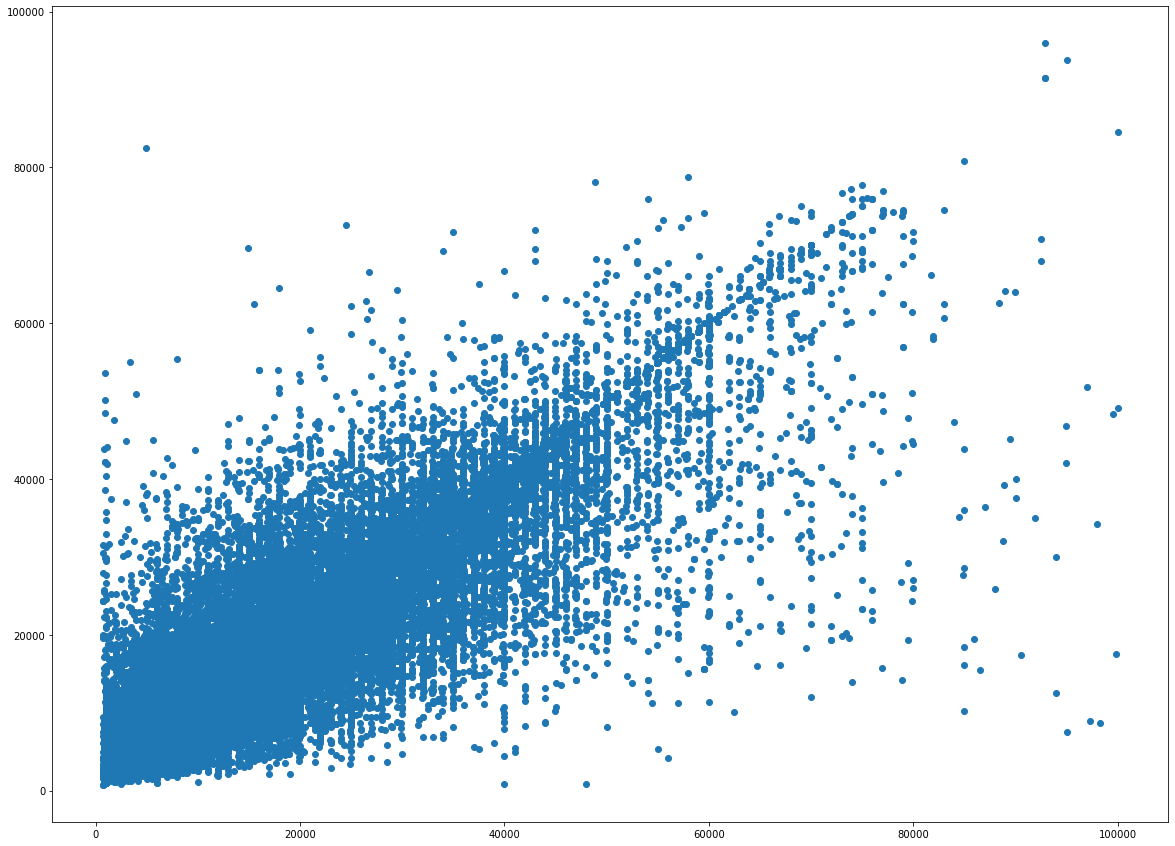

In [178]:
knn_pre = best_knn.predict(X_test)

knn_mse = metrics.mean_squared_error(y_test, knn_pre)
knn_mae = metrics.mean_absolute_error(y_test, knn_pre)
knn_rmse = math.sqrt(metrics.mean_squared_error(y_test, knn_pre))

model_score = model_score.append(pd.DataFrame({'MAE':[knn_mae], 'MSE':[knn_mse],'RMSE': [knn_rmse]}, index = ['K - Nearest Neighbor']))

print('-------------K-Nearest Neighbor -------------')
print("K-Nearest Neighbor Model RMSE = {:.2f}".format((knn_rmse)))
print("K-Nearest Neighbor Model MAE = {:.2f}".format((knn_mae)))
print("K-Nearest Neighbor Model MSE = {:.2f}".format((knn_mse)))
fig, ax = plt.subplots(figsize=(20,15))
plt.scatter(y_test, knn_pre)

## XGBoost with CV

In [179]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from searchgrid import set_grid, make_grid_search
from sklearn.model_selection import GridSearchCV
import xgboost as xgb
from xgboost.sklearn import XGBClassifier
import pandas as pd
import numpy as np

In [180]:
xgtrain = xgb.DMatrix(X_train, label=y_train)
xgb1 = xgb.XGBClassifier(
    learning_rate = 0.2,
    n_estimators = 100,
    max_depth = 5,
    min_child_weight = 1,
    gamma = 0,
    subsample = 0.8,
    alpha = 1,
    objective="reg:squarederror", 
    booster="gbtree"
    )

In [181]:
# fit model
xg_reg = xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree = 0.3, learning_rate = 0.3,
                max_depth = 5, alpha = 10, n_estimators = 50)

xg_reg.fit(X_train,y_train)

xgb_pre = xg_reg.predict(X_test)

In [182]:
xgb_mae = round(metrics.mean_absolute_error(y_test, xgb_pre),2)
xgb_mse =  round(metrics.mean_squared_error(y_test, xgb_pre),2)
xgb_rmse = round(np.sqrt(metrics.mean_squared_error(y_test, xgb_pre)),2)
model_score = model_score.append(pd.DataFrame({'MAE':[xgb_mae], 'MSE':[xgb_mse],'RMSE': [xgb_rmse]}, index = ['XGBoost']))
print('-------------XGBoost -------------')
print("XGBoost Model RMSE = {:.2f}".format((xgb_rmse)))
print("XGBoost Model MAE = {:.2f}".format((xgb_mae)))
print("XGBoost Model MSE = {:.2f}".format((xgb_mse)))

-------------XGBoost -------------
XGBoost Model RMSE = 5571.98
XGBoost Model MAE = 3577.53
XGBoost Model MSE = 31046919.76


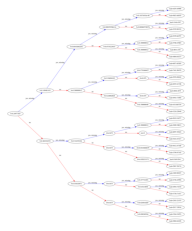

In [183]:
import matplotlib.pyplot as plt

xgb.plot_tree(xg_reg,rankdir='LR', num_trees=0)
plt.rcParams['figure.figsize'] = [50,80]
plt.show()

## Random Forest

In [184]:
from sklearn.ensemble import RandomForestRegressor

regressor = RandomForestRegressor(n_estimators=100, random_state=0)
regressor.fit(X_train, y_train)
rm_pred = regressor.predict(X_test)

<ipython-input-184-c614870b69b3>:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regressor.fit(X_train, y_train)


-------------Random Forest Model -------------
Random ForestModel RMSE = 4163.95
Random ForestModel MAE = 2082.37
Random Forest Model MSE = 17338442.81


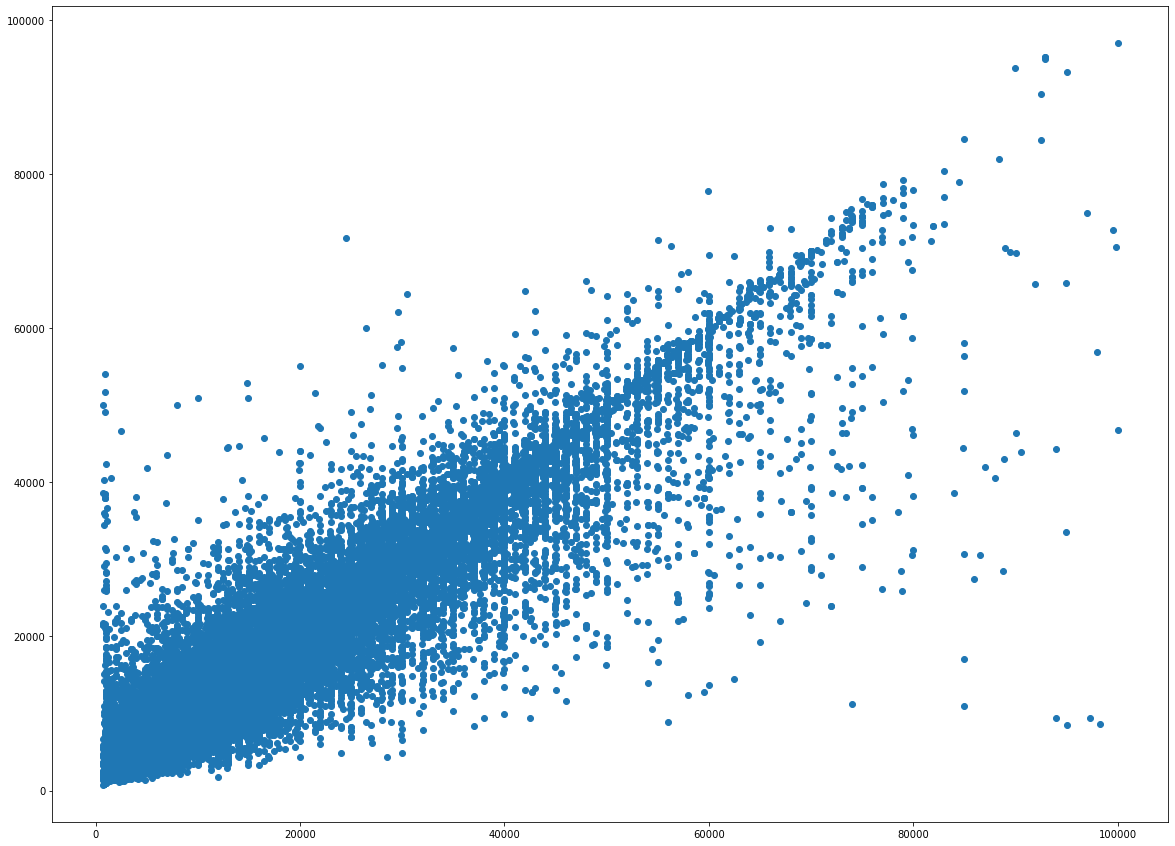

In [185]:
rm_mae = round(metrics.mean_absolute_error(y_test, rm_pred),2)
rm_mse = round(metrics.mean_squared_error(y_test, rm_pred),2)
rm_rmse = round(np.sqrt(metrics.mean_squared_error(y_test, rm_pred)),2)

model_score = model_score.append(pd.DataFrame({'MAE':[rm_mae], 'MSE':[rm_mse],'RMSE': [rm_rmse]}, index = ['Random Forest']))
print('-------------Random Forest Model -------------')
print("Random ForestModel RMSE = {:.2f}".format((rm_rmse)))
print("Random ForestModel MAE = {:.2f}".format((rm_mae)))
print("Random Forest Model MSE = {:.2f}".format((rm_mse)))

fig, ax = plt.subplots(figsize=(20,15))
plt.scatter(y_test, rm_pred)

### select variable

In [186]:
# Get numerical feature importances
importances = list(rf.feature_importances_)

# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]

# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

NameError: name 'rf' is not defined

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
# Set the style
plt.style.use('fivethirtyeight')
# list of x locations for plotting
x_values = list(range(len(importances)))
# Make a bar chart
plt.bar(x_values, importances, orientation = 'vertical')
# Tick labels for x axis
plt.xticks(x_values, feature_list, rotation='vertical')
# Axis labels and title
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');

In [ ]:
# List of features sorted from most to least important
sorted_importances = [importance[1] for importance in feature_importances]
sorted_features = [importance[0] for importance in feature_importances]
# Cumulative importances
cumulative_importances = np.cumsum(sorted_importances)
# Make a line graph
plt.plot(x_values, cumulative_importances, 'g-')
# Draw line at 90% of importance retained
plt.hlines(y = 0.90, xmin=0, xmax=len(sorted_importances), color = 'r', linestyles = 'dashed')
# Format x ticks and labels
plt.xticks(x_values, sorted_features, rotation = 'vertical')
# Axis labels and title
plt.xlabel('Variable'); plt.ylabel('Cumulative Importance');
plt.title('Cumulative Importances');

In [ ]:
# Find number of features for cumulative importance of 90%
print('Number of features for 90% importance:', np.where(cumulative_importances > 0.90)[0][0] + 1)

In [ ]:
# New random forest with only the most important variables
rf_most_important = RandomForestRegressor(n_estimators=100, random_state=0)

In [ ]:
# Extract the most important features
features= df.drop('price', axis = 1)

# Saving feature names for later use
feature_list = list(features.columns)
# Convert to numpy array
features = np.array(features)


important_indices = [feature_list.index('year'), feature_list.index('odometer'), 
                     feature_list.index('drive'), feature_list.index('car_model'),
                     feature_list.index('fuel'), feature_list.index('cylinders'), feature_list.index('type')]

train_important = X_train.loc[:, important_indices]
test_important = X_test.loc[:, important_indices]

In [ ]:
# Train the random forest
rf_most_important.fit(train_important, y_train)

In [ ]:
predictions = rf_most_important.predict(test_important)

In [ ]:
from sklearn import metrics
print('Mean Absolute Error:', round(metrics.mean_absolute_error(y_test, predictions),2))
print('Mean Squared Error:', round(metrics.mean_squared_error(y_test, predictions),2))
print('Root Mean Squared Error:', round(np.sqrt(metrics.mean_squared_error(y_test, predictions)),2))

## Model Comparison 

In [ ]:
model_score.sort_values(by=['RMSE'], ascending=True)